# Crossentropy method

This notebook will teach you to solve reinforcement learning problems with crossentropy method. We'll follow-up by scaling everything up and using neural network policy.

In [20]:
# In Google Colab, uncomment this:
# !wget https://bit.ly/2FMJP5K -O setup.py && bash setup.py

# XVFB will be launched if you run on a server
import os
if type(os.environ.get("DISPLAY")) is not str or len(os.environ.get("DISPLAY")) == 0:
    !bash ../xvfb start
    os.environ['DISPLAY'] = ':1'

In [21]:
import gym
import numpy as np
import pandas as pd

env = gym.make("Taxi-v2")
env.reset()
env.render()
env.step(2)
env.render()
env.step(3)
env.render()


+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (East)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)


In [22]:
n_states = env.observation_space.n
n_actions = env.action_space.n

print("n_states=%i, n_actions=%i" % (n_states, n_actions))

n_states=500, n_actions=6


# Create stochastic policy

This time our policy should be a probability distribution.

```policy[s,a] = P(take action a | in state s)```

Since we still use integer state and action representations, you can use a 2-dimensional array to represent the policy.

Please initialize policy __uniformly__, that is, probabililities of all actions should be equal.


In [23]:
policy = np.ones((n_states, n_actions))/n_actions
print(policy[1,1])
print([x for x in policy[1,]])
print([x for x in range(0,10)])

0.16666666666666666
[0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666, 0.16666666666666666]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]


In [24]:
assert type(policy) in (np.ndarray, np.matrix)
assert np.allclose(policy, 1./n_actions)
assert np.allclose(np.sum(policy, axis=1), 1)

# Play the game

Just like before, but we also record all states and actions we took.

In [26]:
def generate_session(policy, t_max=10**4):
    """
    Play game until end or for t_max ticks.
    :param policy: an array of shape [n_states,n_actions] with action probabilities
    :returns: list of states, list of actions and sum of rewards
    """
    states = []
    actions = []
    total_reward = 0.0

    s = env.reset()
    
    print([x for x in range(0,n_actions)])

    for t in range(t_max):

        #print([x for x in range(1,n_actions)])
        #print( [y for y in policy[s,] ])
        #print(zip([x for x in range(1,n_actions)], [y for y in policy[s,] ]))
        #print(policy[s,1])
        
        # choose from actions with corresponding probabilities
        # dependent on current state (s) and choosing dependent on prob (s,a)
        a = np.random.choice(  [x for x in range(0,n_actions)], p=[y for y in policy[s,] ]  )
        # <sample action from policy(hint: use np.random.choice) >
        # TODO: make this dependent on current state (s) and choosing dependent on prob (s,a)

        new_state, new_reward, done, info = env.step(a)

        # Record state, action and add up reward to states,actions and total_reward accordingly.
        states.append(s)
        actions.append(a)
        total_reward += new_reward

        s = new_state
        if done:
            break
            
    return states, actions, total_reward



def play_game_final(policy, t_max=10**3):
    """
    Play game until with a given policy matrix.
    :param policy: an array of shape [n_states,n_actions] with action probabilities
    :returns: list of states, list of actions and sum of rewards
    """
    states = []
    actions = []
    total_reward = 0.0

    s = env.reset()
    
    for t in range(t_max):
        
        a = np.random.choice(  [x for x in range(0,n_actions)], p=[y for y in policy[s,] ]  )
    
        new_state, new_reward, done, info = env.step(a)

        # Record state, action and add up reward to states,actions and total_reward accordingly.
        states.append(s)
        actions.append(a)
        total_reward += new_reward

        s = new_state
        if done:
            break
    
        # CONCEPT: show game board
        env.render()
            
    return states, actions, total_reward

In [27]:
s, a, r = generate_session(policy)
assert type(s) == type(a) == list
assert len(s) == len(a)
assert type(r) in [float, np.float]
print(r)
print(s)
print(a)

[0, 1, 2, 3, 4, 5]
-411.0
[184, 84, 64, 64, 64, 164, 184, 184, 184, 84, 96, 196, 296, 296, 196, 176, 176, 76, 176, 276, 176, 196, 296, 276, 176, 156, 156, 256, 156, 56, 56, 156, 136, 136, 236, 256, 356, 256, 356, 336, 436, 436, 456, 456, 456, 356, 356, 356, 356, 356, 336, 436, 436, 436, 436, 436, 436, 436, 336, 336, 356, 336, 236, 256, 236, 336, 356, 356, 356, 456, 456, 436, 456, 456, 456, 436, 436, 436, 436, 436, 436, 336, 336, 336, 336, 336, 356, 356, 356, 356, 356, 356, 456, 456, 456, 356, 256, 256, 356, 256, 156, 136, 136, 116, 116, 116, 116, 16]
[1, 3, 5, 4, 0, 2, 2, 5, 1, 4, 0, 0, 5, 1, 3, 5, 1, 0, 0, 1, 2, 0, 3, 1, 3, 4, 0, 1, 1, 5, 0, 3, 5, 0, 2, 0, 1, 0, 3, 0, 0, 2, 4, 4, 1, 5, 5, 2, 2, 3, 0, 5, 4, 5, 5, 3, 4, 1, 4, 2, 3, 1, 2, 3, 0, 2, 5, 5, 0, 2, 3, 2, 0, 5, 3, 4, 4, 5, 4, 0, 1, 4, 5, 4, 4, 2, 2, 4, 2, 4, 5, 0, 2, 2, 1, 1, 5, 0, 1, 1, 3, 5, 3, 4, 3, 5, 1, 5]


[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3, 4, 5]
[0, 1, 2, 3,

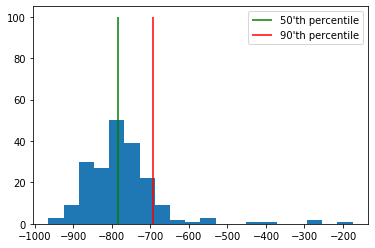

In [28]:
# let's see the initial reward distribution
import matplotlib.pyplot as plt
%matplotlib inline

sample_rewards = [generate_session(policy, t_max=1000)[-1] for _ in range(200)]

plt.hist(sample_rewards, bins=20)
plt.vlines([np.percentile(sample_rewards, 50)], [0], [100], label="50'th percentile", color='green')
plt.vlines([np.percentile(sample_rewards, 90)], [0], [100], label="90'th percentile", color='red')
plt.legend()

print(sample_rewards)

### Crossentropy method steps

In [29]:
def select_elites(states_batch, actions_batch, rewards_batch, percentile=50):
    """
    Select states and actions from games that have rewards >= percentile
    :param states_batch: list of lists of states, states_batch[session_i][t]
    :param actions_batch: list of lists of actions, actions_batch[session_i][t]
    :param rewards_batch: list of rewards, rewards_batch[session_i]

    :returns: elite_states,elite_actions, both 1D lists of states and respective actions from elite sessions

    Please return elite states and actions in their original order 
    [i.e. sorted by session number and timestep within session]

    If you are confused, see examples below. Please don't assume that states are integers
    (they will become different later).
    """

    reward_threshold = np.percentile(rewards_batch, percentile) # -690 # <Compute minimum reward for elite sessions. Hint: use np.percentile >

    #i_array_index_find = find(rewards_batch > reward_threshold)
    #i_array_index = np.where(rewards_batch > reward_threshold)
    i_array_index = [index for index, x in enumerate(rewards_batch) if x >= reward_threshold  ]
    
    elite_states  = [states_batch[x]  for x in i_array_index] # states_batch[i_array_index]  
    elite_actions = [actions_batch[x] for x in i_array_index] # actions_batch[i_array_index]

    return elite_states, elite_actions

In [30]:
states_batch = [
    [1, 2, 3],     # game1
    [4, 2, 0, 2],  # game2
    [3, 1],        # game3
]

actions_batch = [
    [0, 2, 4],     # game1
    [3, 2, 0, 1],  # game2
    [3, 3],        # game3
]
rewards_batch = [
    3,  # game1
    4,  # game2
    5,  # game3
]

print(select_elites(
    states_batch, actions_batch, rewards_batch, percentile=90))

#test_result_0 = select_elites(
#    states_batch, actions_batch, rewards_batch, percentile=0)
#test_result_40 = select_elites(
#    states_batch, actions_batch, rewards_batch, percentile=30)
#test_result_90 = select_elites(
#    states_batch, actions_batch, rewards_batch, percentile=90)
#test_result_100 = select_elites(
#    states_batch, actions_batch, rewards_batch, percentile=100)

#assert np.all(test_result_0[0] == [1, 2, 3, 4, 2, 0, 2, 3, 1])  \
#    and np.all(test_result_0[1] == [0, 2, 4, 3, 2, 0, 1, 3, 3]),\
#    "For percentile 0 you should return all states and actions in chronological order"
#assert np.all(test_result_40[0] == [4, 2, 0, 2, 3, 1]) and \
#    np.all(test_result_40[1] == [3, 2, 0, 1, 3, 3]),\
#    "For percentile 30 you should only select states/actions from two first"
#assert np.all(test_result_90[0] == [3, 1]) and \
#    np.all(test_result_90[1] == [3, 3]),\
#    "For percentile 90 you should only select states/actions from one game"
#assert np.all(test_result_100[0] == [3, 1]) and\
#    np.all(test_result_100[1] == [3, 3]),\
#    "Please make sure you use >=, not >. Also double-check how you compute percentile."
#print("Ok!")

([[3, 1]], [[3, 3]])


In [31]:
def update_policy(elite_states, elite_actions):
    """
    Given old policy and a list of elite states/actions from select_elites,
    return new updated policy where each action probability is proportional to

    policy[s_i,a_i] ~ #[occurences of si and ai in elite states/actions]

    Don't forget to normalize policy to get valid probabilities and handle 0/0 case.
    In case you never visited a state, set probabilities for all actions to 1./n_actions

    :param elite_states: 1D list of states from elite sessions
    :param elite_actions: 1D list of actions from elite sessions

    """

    new_policy  = np.zeros([n_states, n_actions])
    
    i_size_list = len(elite_states)

    # <Your code here: update probabilities for actions given elite states & actions >
    
    # for each element of states and actions vector
    for i_temp_counter in range(0,i_size_list):
        
        # get the corresponding state and action
        temp_state  = elite_states[i_temp_counter]
        temp_action = elite_actions[i_temp_counter]
        
        # for ith state, jth action
        # record the fact that these occurred (co-occurred)
        # this is now the policy[i,j]
        # add 1 more to the count in this entry
        new_policy[temp_state, temp_action] = new_policy[temp_state, temp_action]
        

    # for each element of policy matrix
    # turn it into a probability
    # normnalize by row sum counts frequencies
    for i_temp_counter in range(0,n_states):
        for j_temp_counter in range(0, n_actions):
            
            if new_policy[i_temp_counter, j_temp_counter] > 0:
                temp_row_sum = sum(new_policy[i_temp_counter,0:])
                
                print(temp_row_sum)
                
                new_policy[i_temp_counter, j_temp_counter] = new_policy[i_temp_counter, j_temp_counter]/temp_row_sum
                
        
        
    # Don't forget to set 1/n_actions for all actions in unvisited states.
    # Now you have counts/frequencies in new_policy
    # Make these probabilities
    
    # for each element of policy matrix
    for i_temp_counter in range(0,n_states):
        for j_temp_counter in range(0, n_actions):
            
            # if the element of this matrix is 0 then make 1/n_actions
            if new_policy[i_temp_counter, j_temp_counter] == 0:
                new_policy[i_temp_counter, j_temp_counter] = 1/n_actions
    

    
    
    return new_policy

In [32]:
elite_states = [1, 2, 3, 4, 2, 0, 2, 3, 1]
elite_actions = [0, 2, 4, 3, 2, 0, 1, 3, 3]

print("1")

update_policy(elite_states, elite_actions)

new_policy = update_policy(elite_states, elite_actions)

#assert np.isfinite(new_policy).all(
#), "Your new policy contains NaNs or +-inf. Make sure you don't divide by zero."
#assert np.all(
#    new_policy >= 0), "Your new policy can't have negative action probabilities"
#assert np.allclose(new_policy.sum(
#    axis=-1), 1), "Your new policy should be a valid probability distribution over actions"
reference_answer = np.array([
    [1.,  0.,  0.,  0.,  0.],
    [0.5,  0.,  0.,  0.5,  0.],
    [0.,  0.33333333,  0.66666667,  0.,  0.],
    [0.,  0.,  0.,  0.5,  0.5]])
#assert np.allclose(new_policy[:4, :5], reference_answer)
#print("Ok!")

1


# Training loop
Generate sessions, select N best and fit to those.

In [33]:
from IPython.display import clear_output

def show_progress(rewards_batch, log, percentile, reward_range=[-990, +10]):
    """
    A convenience function that displays training progress. 
    No cool math here, just charts.
    """

    mean_reward = np.mean(rewards_batch)
    threshold = np.percentile(rewards_batch, percentile)
    log.append([mean_reward, threshold])

    clear_output(True)
    print("mean reward = %.3f, threshold=%.3f" % (mean_reward, threshold))
    plt.figure(figsize=[8, 4])
    plt.subplot(1, 2, 1)
    plt.plot(list(zip(*log))[0], label='Mean rewards')
    plt.plot(list(zip(*log))[1], label='Reward thresholds')
    plt.legend()
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.hist(rewards_batch, range=reward_range)
    plt.vlines([np.percentile(rewards_batch, percentile)],
               [0], [100], label="percentile", color='red')
    plt.legend()
    plt.grid()

    plt.show()

In [34]:
# reset policy just in case
policy = np.ones([n_states, n_actions]) / n_actions

mean reward = -777.640, threshold=-695.000


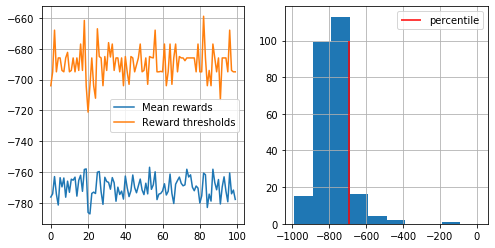

+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (West)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (Pickup)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (South)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | : |
|Y| : |B: |
+---------+
  (North)
+---------+
|R: | : :G|
| : : : : |
| : : : : |
| | : | 

([283,
  283,
  283,
  263,
  163,
  163,
  163,
  163,
  263,
  163,
  63,
  83,
  83,
  83,
  83,
  83,
  83,
  83,
  83,
  183,
  283,
  283,
  283,
  383,
  383,
  283,
  183,
  183,
  83,
  63,
  63,
  63,
  43,
  43,
  63,
  163,
  163,
  143,
  123,
  23,
  23,
  123,
  143,
  143,
  243,
  243,
  143,
  43,
  43,
  43,
  43,
  63,
  43,
  43,
  143,
  163,
  163,
  163,
  163,
  263,
  263,
  243,
  243,
  343,
  343,
  443,
  443,
  443,
  443,
  443,
  443,
  443,
  443,
  443,
  443,
  443,
  443,
  443,
  423,
  423,
  423,
  323,
  223,
  203,
  203,
  103,
  123,
  143,
  163,
  63,
  43,
  43,
  63,
  63,
  63,
  163,
  163,
  183,
  183,
  183],
 [4,
  4,
  3,
  1,
  4,
  4,
  4,
  0,
  1,
  1,
  2,
  5,
  5,
  1,
  5,
  4,
  4,
  2,
  0,
  0,
  2,
  2,
  0,
  5,
  1,
  1,
  2,
  1,
  3,
  4,
  4,
  3,
  3,
  2,
  0,
  4,
  3,
  3,
  1,
  5,
  0,
  2,
  4,
  0,
  5,
  1,
  1,
  5,
  4,
  4,
  2,
  3,
  1,
  0,
  2,
  4,
  4,
  4,
  0,
  5,
  3,
  4,
  0,
  2,
  0,
  2,


In [35]:
n_sessions = 250  # sample this many sessions
percentile = 90  # take this percent of session with highest rewards
learning_rate = 0.5  # add this thing to all counts for stability

log = []

for i in range(100):

    %time sessions = [generate_session(policy, t_max=1000) for _ in range(n_sessions)] # [ < generate a list of n_sessions new sessions > ]

    states_batch, actions_batch, rewards_batch = zip(*sessions)
    
    # states_batch, actions_batch, rewards_batch = [generate_session(policy, t_max=1000)[-1] for _ in range(200)]

    elite_states, elite_actions = select_elites(states_batch, actions_batch, rewards_batch, percentile=percentile)  #<select elite states/actions >

    new_policy = update_policy(elite_states, elite_actions) # <compute new policy >

    policy = learning_rate*new_policy + (1-learning_rate)*policy

    # display results on chart
    show_progress(rewards_batch, log, percentile)

    
# Play game with final policy
play_game_final(policy=policy, t_max=100)


### Reflecting on results

You may have noticed that the taxi problem quickly converges from <-1000 to a near-optimal score and then descends back into -50/-100. This is in part because the environment has some innate randomness. Namely, the starting points of passenger/driver change from episode to episode.

In case CEM failed to learn how to win from one distinct starting point, it will simply discard it because no sessions from that starting point will make it into the "elites".

To mitigate that problem, you can either reduce the threshold for elite sessions (duct tape way) or  change the way you evaluate strategy (theoretically correct way). You can first sample an action for every possible state and then evaluate this choice of actions by running _several_ games and averaging rewards.

### Submit to coursera

In [ ]:
from submit import submit_taxi
#submit_taxi(generate_session, policy, 'neel.soumya@gmail.com', '')